<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

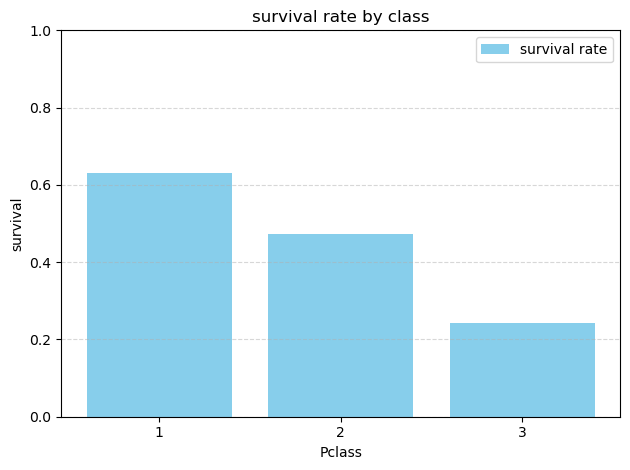

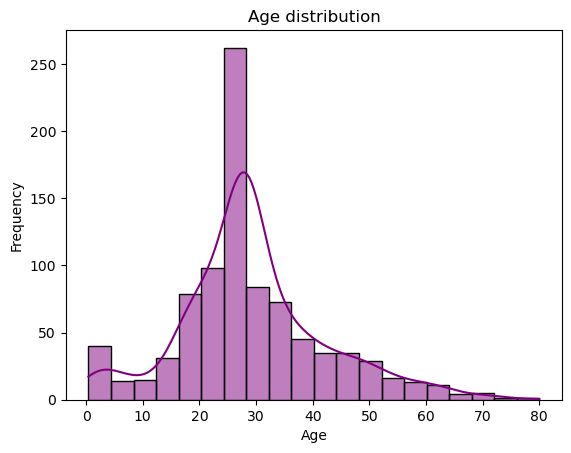

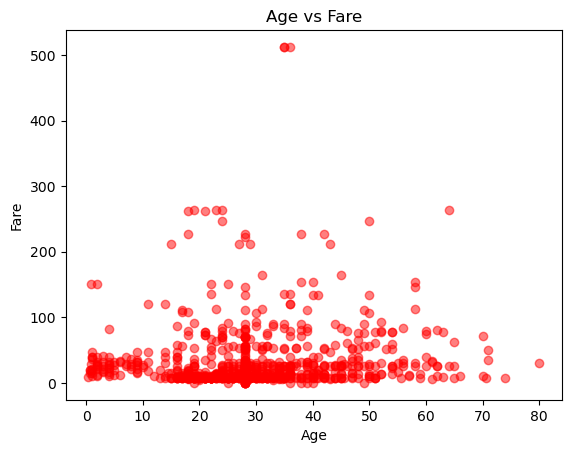

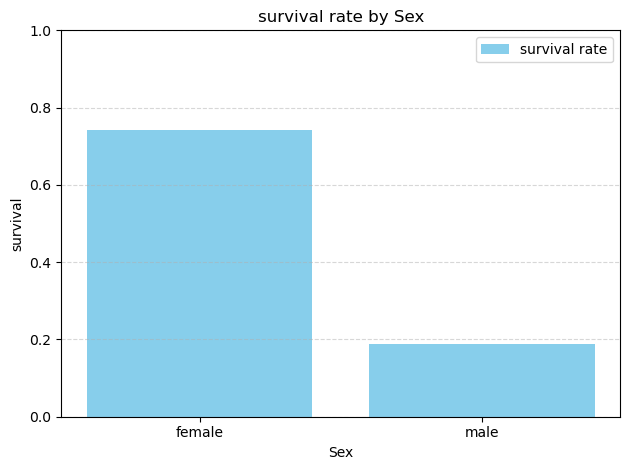

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df.info())
print(df.describe())
print(df.isnull().sum())

# Handeling missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Removing duplcate
df = df.drop_duplicates()

# Filtering first class passenger
first_class = df[df["Pclass"] == 1]
print("Passenger class: \n", first_class.head())

# Bar chart: survival rate by class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
plt.bar(survival_by_class.index.astype(str), survival_by_class.values, color = 'skyblue', label = 'survival rate')
plt.title('survival rate by class')
plt.ylabel('survival')
plt.xlabel('Pclass')
plt.ylim(0, 1)
plt.tight_layout()
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.show()

# Histogram: Age distribution
sns.histplot(df["Age"], kde = True, bins = 20, color = 'purple')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scater: Age vs fare
plt.scatter(df["Age"], df["Fare"], alpha = 0.5, color = 'red')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Bar chart: survival rate by sex
survival_by_class = df.groupby("Sex")["Survived"].mean()
plt.bar(survival_by_class.index.astype(str), survival_by_class.values, color = 'skyblue', label = 'survival rate')
plt.title('survival rate by Sex')
plt.ylabel('survival')
plt.xlabel('Sex')
plt.ylim(0, 1)
plt.tight_layout()
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.show()


# Identification and observation of data patterns: 
    # older people pays higher.
    # People in 1st class ahve higher survival rate
    # Female survived more as compare to mens